In [1]:
from importlib import reload
import numpy as np
import RTNI
import sympy
import tensornetwork as tn

import converters
import twirl
twirl = reload(twirl)

## Compute $\int_{\mathbf{U}(d)}\!\mathrm{d}U\,\left(U \otimes U\right)X\left(U^{\dagger} \otimes U^{\dagger}\right)$

### Symbolic computation with RTNI

#### Define the integrand: $\left(U \otimes U\right)X\left(U^{\dagger} \otimes U^{\dagger}\right)$.

In [2]:
g = [
    [["U", 1, "in", 1], ["X", 1, "out", 1]],
    [["U", 2, "in", 1], ["X", 1, "out", 2]],
    [["X", 1, "in", 1], ["U*", 1, "out", 1]],
    [["X", 1, "in", 2], ["U*", 2, "out", 1]]
]
gw = [g, 1]
gw

[[[['U', 1, 'in', 1], ['X', 1, 'out', 1]],
  [['U', 2, 'in', 1], ['X', 1, 'out', 2]],
  [['X', 1, 'in', 1], ['U*', 1, 'out', 1]],
  [['X', 1, 'in', 2], ['U*', 2, 'out', 1]]],
 1]

#### Visualize it.

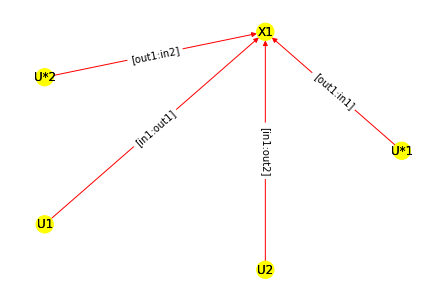

1


In [3]:
RTNI.visualizeTN([g, 1])

#### Compute the Haar average.

In [4]:
d = sympy.symbols("d")
averaged = RTNI.integrateHaarUnitary(gw, ["U", [d], [d], d])
averaged

[[[[['@U*', 1, 'in', 1], ['@U', 1, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 2, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 1]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 2]]],
  1/(d**2 - 1)],
 [[[['@U*', 1, 'in', 1], ['@U', 1, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 2, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 2]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 1]]],
  -1/(d**3 - d)],
 [[[['@U*', 1, 'in', 1], ['@U', 2, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 1, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 1]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 2]]],
  -1/(d**3 - d)],
 [[[['@U*', 1, 'in', 1], ['@U', 2, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 1, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 2]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 1]]],
  1/(d**2 - 1)]]

#### Visualize the result.

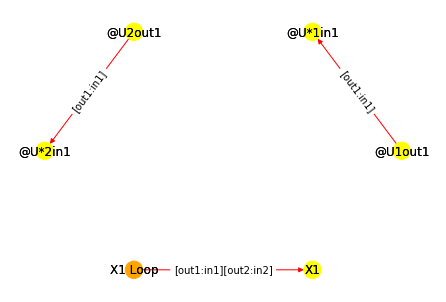

1/(d**2 - 1)


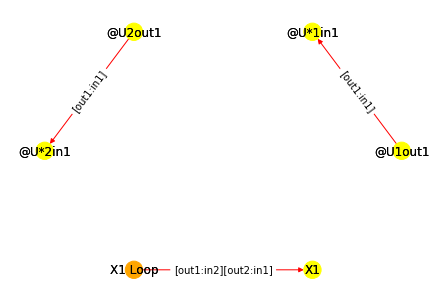

-1/(d**3 - d)


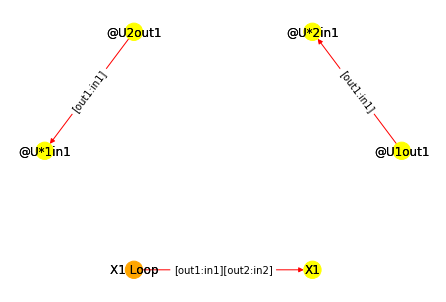

-1/(d**3 - d)


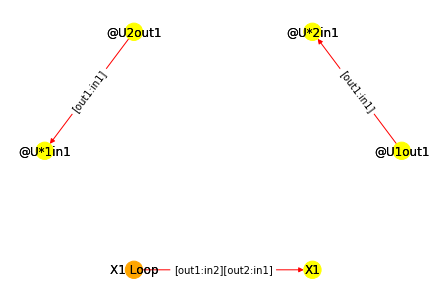

1/(d**2 - 1)


In [5]:
RTNI.visualizeTN(averaged)

### Apply symbolic computation to numerical example with `TensorNetwork`

#### Generate example.

In [6]:
d_value = 4

In [7]:
X = tn.Node(np.random.randn(*(d_value,) * 4))

#### Convert symbolic average to numerical one under `TensorNetwork` format.

In [8]:
expectation = converters.rtni_to_tn(averaged, {
    "X": X
},
d_symbol=d,
d_value=d_value,
n_tensor_factors=2)
expectation

array([[[[0.3346735 , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.09918392, 0.        , 0.        ],
         [0.23548959, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.09918392, 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.23548959, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        , 0.09918392],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.23548959, 0.        , 0.        , 0.        ]]],


       [[[0.        , 0.23548959, 0.        , 

### Shortcut to direct numerical example with `TensorNetwork`

In [9]:
twirl.numerical_haar_average_twirl(
    tensor=X,
    d_value=d_value,
    n_tensor_factors=2
)

array([[[[0.3346735 , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.09918392, 0.        , 0.        ],
         [0.23548959, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.09918392, 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.23548959, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        , 0.09918392],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.23548959, 0.        , 0.        , 0.        ]]],


       [[[0.        , 0.23548959, 0.        , 

### Compare to statistical average

In [10]:
twirl.haar_statistical_average_twirl(
    tensors=[X],
    output_edges=[X[0], X[1]],
    input_edges=[X[2], X[3]],
    d_value=d_value,
    n_tensor_factors=2,
    n_samples=10000
)

array([[[[ 3.40691292e-01-3.81937085e-03j,
          -1.87511762e-03-1.05651242e-02j,
          -3.94522661e-03-1.45492479e-03j,
           2.37607777e-03-2.16300606e-03j],
         [ 2.55817004e-03+1.38381855e-03j,
          -4.88644017e-03-1.03805373e-02j,
           3.86905817e-03+5.04308490e-03j,
           4.24792601e-04-1.34760983e-03j],
         [ 4.16487693e-03+2.78801569e-03j,
           6.53989156e-03-8.21976792e-03j,
          -7.96324221e-03+3.22523118e-03j,
          -1.37961171e-02-1.48470068e-02j],
         [ 8.79195554e-03-6.57477429e-03j,
          -4.07038800e-03-6.37724630e-03j,
          -8.64759258e-03+5.76586945e-03j,
          -3.80424734e-03+2.61525121e-05j]],

        [[ 2.73923303e-03-8.20142491e-04j,
           1.01429382e-01-7.78992133e-03j,
          -2.65696050e-03-5.22001187e-03j,
           2.04650136e-02+1.14704220e-03j],
         [ 2.38854731e-01+1.41889083e-03j,
           2.05905641e-03+6.34832511e-03j,
           4.18312177e-04-2.07265598e-03j,
    